# CSIT5210 Assignment

## Spring 2019

### Instructor: Dr. Kenneth Leung (kwtleung@cse.ust.hk)

### TA: Dr. Kevin Wang (kevinw@ust.hk)


---

## [Group Signup link](https://docs.google.com/spreadsheets/d/1k523REcIAs6uo5rT0nISXjgk8R58ARvzjWE48pKQC_k/edit#gid=0)

## Description

In this assignment, you will have an opportunity to apply some data mining techniques that you learned in the class to a problem.

To get started on this assignment, you need to download the given dataset and read the description carefully written on this page. Please note that all implementation of your program should be done with Python.

You are required to form a team with at most 3 students. You and your groupmates should evenly divide the project tasks yourself. All team members are going to graded with the same score.

There are two parts in this assignment. Part 1 is a programming exercise that your groups are required to complete certain tasks using Python. You should complete your Part 1 in this jupyter notebook (.ipynb file) directly. Part 2 is a group presentation that you need to present your findings on the Task 5 of Part 1.

## Submission

| Part | Due Date | Submission by | Files to Submit |
|---|-----|------|----|
| Part 1 | 1/5/2019 (Wed) 23:59 | [email to TA](mailto:kevinw@ust.hk) | this `ipynb` file. |
| Part 2 | 7/5/2019 (Thu) during lecture | Printed hardcopy | Presentation slides (4 slides per page) |

## Prerequesite

You are recommended to install the following packages

* pandas
* geohash
* matplotlib
* sklearn

To install these packages, you shall type in your terminal

```
> pip install pandas
> pip install geohash
> pip install matplotlib
> pip install sklearn
```

The package geohash is a little tricky to install.

## About the data and the context

We are working on some data related to shared bike. There are two sets of data provided: 
* Mobike (China based data) - For Part 1 Task 1 to Task 4
* bike share (US based data) - For Part 1 Task 5 

## Download Area

You can [download the data here](https://home.cse.ust.hk/~kevinw/CSIT5210/data.zip)

There are some API and reference codes that might be useful for your assignment. [download code here](https://home.cse.ust.hk/~kevinw/CSIT5210/code.zip)

### Mobike

The data acquired from Mobike looks like the following. Apparently `orderid` is an unique ID refers to the transaction ID, `userid` refers to the registered user and `bikeid` refers to the ID of the bike. `biketype` refers to the type of the bike can be either 1 or 2. `starttime` refers to the starts of the loan. The starting location and ending location are GPS coordinates compressed in geohashed. We will let you know how to convert that back to x,y coordinates later.


In [1]:
import pandas as pd
mobikedata = pd.read_csv('mobikeData.csv', sep=',', nrows= 10, index_col= ['orderid'])
mobikedata.head(10)

,userid,bikeid,biketype,starttime,geohashed_start_loc,geohashed_end_loc
orderid,,,,,,
1893973,451147,210617,2,2017-05-14 22:16:50,wx4snhx,wx4snhj
4657992,1061133,465394,1,2017-05-14 22:16:52,wx4dr59,wx4dquz
2965085,549189,310572,1,2017-05-14 22:16:51,wx4fgur,wx4fu5n
4548579,489720,456688,1,2017-05-14 22:16:51,wx4d5r5,wx4d5r4
3936364,467449,403224,1,2017-05-14 22:16:50,wx4g27p,wx4g266
5163705,917620,509044,1,2017-05-14 22:16:53,wx4gd2e,wx4g6pw
19818,583391,3190,1,2017-05-14 22:16:54,wx4fhkk,wx4fh7q
495333,185893,67441,1,2017-05-14 22:16:53,wx4emgw,wx4emgk
2803108,15906,295614,2,2017-05-14 22:16:55,wx4f8t9,wx4f8tj


### bikeshare

The data acquired from bikeshare looks like the following. `trip_id` refers to the unique ID of a transaction. Bike rented in this system has fixed parking stations and `from_station_id` and `to_station_id` are simply referring the starting and ending location of the loan. 

There are two types of customers: **Customer** and **Subscriber**. A **Subscriber** will register with the company with more details while a **Customer** is an ad-hoc customer that does not register.

In [2]:
divvybike = pd.read_csv('bikeshareTraining.csv', sep=',', nrows = 10, index_col=['trip_id'])
divvybike.head(10)

,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
trip_id,,,,,,,,,,,
19244622,2018-07-01 00:00:03,2018-07-01 23:56:11,5429,"86,168.0",140,Dearborn Pkwy & Delaware Pl,106,State St & Pearson St,Customer,NaN,NaN
19244623,2018-07-01 00:00:13,2018-07-01 00:06:39,93,386.0,153,Southport Ave & Wellington Ave,250,Ashland Ave & Wellington Ave,Subscriber,Male,1986.0
19244624,2018-07-01 00:00:15,2018-07-01 00:23:26,2461,"1,391.0",76,Lake Shore Dr & Monroe St,301,Clark St & Schiller St,Subscriber,Female,1987.0
19244625,2018-07-01 00:00:25,2018-07-01 00:23:31,2991,"1,386.0",76,Lake Shore Dr & Monroe St,301,Clark St & Schiller St,Subscriber,Male,1986.0
19244626,2018-07-01 00:00:27,2018-07-01 00:11:23,2851,656.0,60,Dayton St & North Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1961.0
19244627,2018-07-01 00:00:35,2018-07-01 00:16:09,5980,934.0,128,Damen Ave & Chicago Ave,71,Morgan St & Lake St,Subscriber,Male,1995.0
19244628,2018-07-01 00:00:37,2018-07-01 00:10:14,3132,577.0,168,Michigan Ave & 14th St,321,Wabash Ave & 9th St,Customer,NaN,NaN
19244629,2018-07-01 00:00:55,2018-07-01 00:09:20,2281,505.0,168,Michigan Ave & 14th St,321,Wabash Ave & 9th St,Customer,NaN,NaN
19244630,2018-07-01 00:01:38,2018-07-01 00:25:25,3465,"1,427.0",229,Southport Ave & Roscoe St,324,Stockton Dr & Wrightwood Ave,Customer,NaN,NaN


## Part 1 - Programming Task

Your team are required to complete the following tasks on this Jupyter notebook. 

1. Data Preprocessing & Statistics - with Mobike Data
2. Data Clustering - with Mobike Data
3. Simple Data Visualization - with Mobike Data
4. Frequent Pattern Mining - with Mobike Data
5. Prediction - with bikeshare Data


In [3]:
import numpy as np
import pandas as pd
import geohash
import math

In [4]:
# Task 1 - Data Preprocessing and Statistics
#
#
# Task 1.1 Read Mobike Data in using the API Pandas.read_csv so that the column 'starttime' is read as datetime64.
#                 Hint: use the parameter parse_dates
#                  ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
#                 To make sure your code works you might want to read only the first 1000 rows and expand it later
mobikedata = pd.read_csv('mobikeData.csv', sep=',', parse_dates=['starttime'])
mobike_record_count = mobikedata.shape[0]
mobike_attribute_count = mobikedata.shape[1]

# Task 1.2 Convert the field geohashed_start_loc and geohashed_end_loc into x-y coordinate using the API Geohash.decode
#                  The package Geohash can be found from pip. You might encounter the problem 
#                   'python3.5.2 can't find the module '  ref: https://github.com/vinsci/geohash/issues/4
#                    This can be fixed very easily. Or
#                   You might directly use the fixed version of Geohash in our project package.
def convert_geo_to_float(geo_tuple):
    lats, lons = geo_tuple
    return (float(lats), float(lons))
mobikedata['geohashed_start_loc'] = mobikedata['geohashed_start_loc'].map(geohash.decode).map(convert_geo_to_float)
mobikedata['geohashed_end_loc'] = mobikedata['geohashed_end_loc'].map(geohash.decode).map(convert_geo_to_float) # lats, lons

# Task 1.3 Create the column 'distance' based on the Euclidean distance  that the order has traveled.
def rad(tude):
    return (math.pi/180.0)*tude

def compute_distance(start, end):
    latitude1 = start[0]
    longitude1 = start[1]
    latitude2 = end[0]
    longitude2 = end[1]
    radLat1 = rad(latitude1)
    radLat2 = rad(latitude2)
    a = radLat1-radLat2
    b = rad(longitude1)-rad(longitude2)
    R = 6378137
    d = R*2*math.asin(math.sqrt(math.pow(math.sin(a/2),2)+math.cos(radLat1)*math.cos(radLat2)*math.pow(math.sin(b/2),2)))
    detallat = abs(a)*R
    detalLon = math.sqrt(d**2-detallat**2)
    if b==0:
        direction = 1/2 if a*b>0 else -1/2
    else:
        direction = math.atan(detallat/detalLon*(1 if a*b>0 else -1))/math.pi
    return round(d)

mobikedata['distance'] = [compute_distance(mobikedata['geohashed_start_loc'].iloc[i], mobikedata['geohashed_end_loc'].iloc[i]) for i in range(mobike_record_count)]

#  Task 1.4.1  Check the memory you have spent by the API .info()
print("--------------\nInfo Before Compressed\n--------------")
mobikedata.info()

#  Task 1.4.2  Compress the field userid bikeid using a smaller data type int32 / uint32 and the field biketype using int8
mobikedata[['userid', 'bikeid', 'biketype']] = mobikedata[['userid', 'bikeid', 'biketype']].astype({"userid": 'int32', "bikeid": 'int32', 'biketype': 'int8'})

# Task 1.4.3 Check the memory you have spent again
print("\n--------------\nInfo After Compressed\n--------------")
mobikedata.info()

# Task 1.4.4 Fetch the first 10 lines of your data to preview it.
print("\n--------------\nPreview\n--------------")
print(mobikedata.head(10))

# Task 1.5  Display the count, mean, standard derviation of the int type variable and 
#                  display the earliest and latest starttime.
int_data = mobikedata.select_dtypes(include=['int64','int32','int16','int8'])
print("\n--------------\nCount\n--------------")
print(int_data.count())
print("\n--------------\nMean\n--------------")
print(int_data.mean(axis=0))
print("\n--------------\nStandard Derviation\n--------------")
print(int_data.std(axis=0))

print("\n--------------\nEarliest Start Time\n--------------")
print(mobikedata['starttime'].min())
print("\n--------------\nLatest Start Time\n--------------")
print(mobikedata['starttime'].max())

# Task 1.6 Find the number of order between (8am to 9am)   and the order between (1am to 2am)
#                 Note: Instead of using only the first 1000 rows, expand your selection of rows to collect enough data.
#                Hint: try the API between_time of DataFrame. 
#           ref:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.between_time.html#pandas.DataFrame.between_time
res_8to9 = mobikedata.set_index(['starttime']).between_time('8:00', '9:00', True, False)
res_1to2 = mobikedata.set_index(['starttime']).between_time('1:00', '2:00', True, False)
num_res_8to9 = res_8to9.shape[0]
num_res_1to2 = res_1to2.shape[0]
print("\n--------------\nNumber of Order between 8am to 9am\n--------------")
print(num_res_8to9)
print("\n--------------\nNumber of Order between 1am to 2am\n--------------")
print(num_res_1to2)

--------------
Info Before Compressed
--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214096 entries, 0 to 3214095
Data columns (total 8 columns):
orderid                int64
userid                 int64
bikeid                 int64
biketype               int64
starttime              datetime64[ns]
geohashed_start_loc    object
geohashed_end_loc      object
distance               int64
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 196.2+ MB

--------------
Info After Compressed
--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214096 entries, 0 to 3214095
Data columns (total 8 columns):
orderid                int64
userid                 int32
bikeid                 int32
biketype               int8
starttime              datetime64[ns]
geohashed_start_loc    object
geohashed_end_loc      object
distance               int64
dtypes: datetime64[ns](1), int32(2), int64(2), int8(1), object(2)
memory usage: 150.2+ MB

--------------
Preview


In [5]:
# Task 2 - Data Clustering 
#
#
# Task 2.1 Playing with the bikeshare data, create a DataFrame that contains two columns. 
#                 The first column (the index) is a time series 0:00, 0:15, 0:30, 0:45, 1:00,... 23:00, 23:15, 23:30, 23:45
#                  The second column is an integer that counts the number of order between in the interval. For example, 0:00 should contains all order happens on or after 0:00 to 0:15.
#  This task is less straight forward, at least in our solution. So let's break down a little bit.

#  Task 2.1.1 Create a list of string containing the series '0:00', '0:15', '0:30', ... '23:45' 
#                     Hint: A double loop with if-else can do the job.
time_interval = []
for i in range(24):
    for j in range(int(60/15)):
        time_interval += [str(i)+":"+(str(j*15) if j != 0 else '00')]

# Task 2.1.2 Count the number of orders. You might use between_time again.
def order_between_time(start, end, df):
    return df.between_time(start_time=start, end_time=end, include_start=True, include_end=False)
def count_order_between_time(start, end, df):
    return order_between_time(start, end, df).shape[0]

data = [[time_interval[i], count_order_between_time(time_interval[i], time_interval[(i+1) % len(time_interval) ], mobikedata.set_index(['starttime']))] \
        for i in range(len(time_interval))]
df = pd.DataFrame(data, columns = ['Time', 'Number of Orders'])
df.set_index(['Time'], inplace=True)
print(df)

       Number of Orders
Time                   
0:00               4605
0:15               3693
0:30               2787
0:45               2221
1:00               1959
1:15               1667
1:30               1399
1:45               1191
2:00               1144
2:15                915
2:30                869
2:45                786
3:00                797
3:15                730
3:30                650
3:45                712
4:00                881
4:15                805
4:30               1071
4:45               1640
5:00               3013
5:15               7160
5:30               7754
5:45              11155
6:00              16448
6:15              23444
6:30              33832
6:45              47987
7:00              64733
7:15              78521
...                 ...
16:30             46511
16:45             57125
17:00             70741
17:15             54267
17:30             75774
17:45             72458
18:00             78197
18:15             69489
18:30           

In [6]:
# Task 2.2.1  Use K-mean algorithm to find 300 cluster centers of the coordinates obtained from  Task 1.2
#                  You may implement your own K-mean algorithm or simply adopt the API sklearn.cluster.KMeans
#                   ref: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
X = list(map(list, mobikedata['geohashed_start_loc'].values))+list(map(list, mobikedata['geohashed_end_loc'].values))
kmeans = KMeans(n_clusters=300, random_state=0, algorithm="full").fit(X)
loc_labels = kmeans.labels_
loc_centers = kmeans.cluster_centers_

# Task 2.2.2 Describe how many % of order has started from a cluster centers and ends at the same cluster centers.  
# i.e., the label of start and end are the same; first # of mobike_record_count labels are the start location
ratio = np.sum([loc_labels[i] == loc_labels[i+mobike_record_count] for i in range(mobike_record_count)]) / mobike_record_count
print("% of order starts and ends at the same cluster centers:", "{0:.4%}".format(ratio))

% of order starts and ends at the same cluster centers: 62.7734%


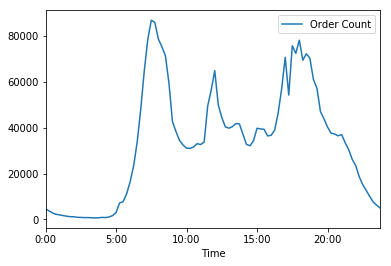

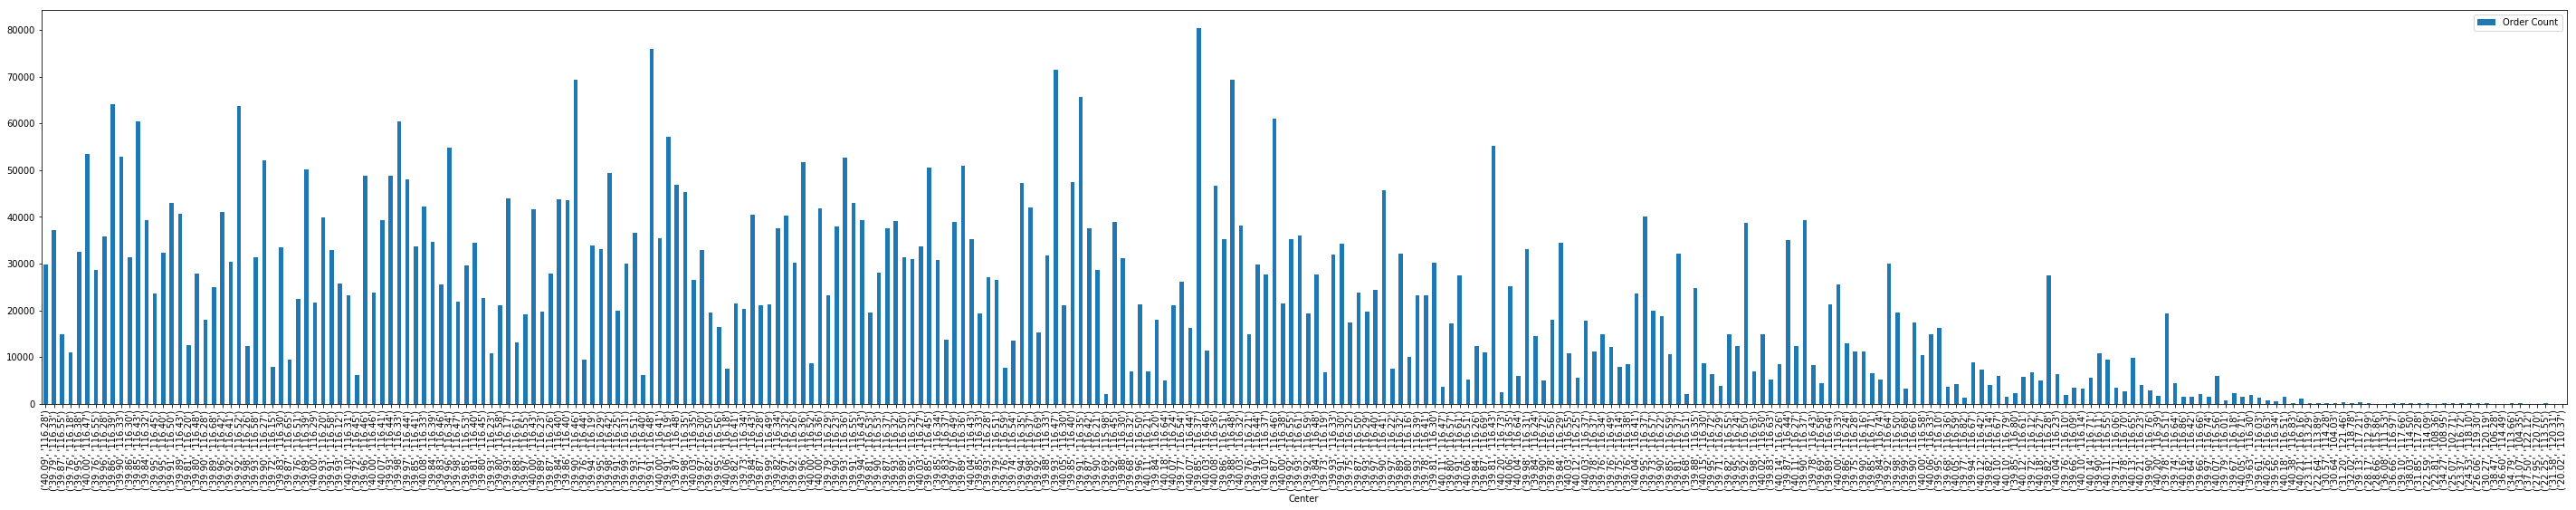

In [7]:
# Task 3 - Simple Data Visualization 
#
#
# Task 3.1 Using data obtained from Task 1.6. Plot a curveof the volume of order in different times of a day.
#                    Hint: try the API DataFrame.plot
%matplotlib inline
import matplotlib.pyplot as plt
# plot for only 1am-2am, 8am-9am
"""
mobike_time_order_df = pd.DataFrame([['8-9', num_res_8to9], ['1-2', num_res_1to2]], \
                                    columns = ['Time', 'Order Count'])
mobike_time_order_df.plot(x='Time', y='Order Count')
"""

# plot for all 15min intervals
mobike_time_order_data_full = [[time_interval[i], count_order_between_time(time_interval[i], time_interval[(i+1) % len(time_interval) ], mobikedata.set_index(['starttime']))] \
                               for i in range(len(time_interval))]
mobike_time_order_df_full =  pd.DataFrame(mobike_time_order_data_full, columns = ['Time', 'Order Count'])
mobike_time_order_df_full.plot(x='Time', y='Order Count')

# Task 3.2 Using data obtained from Task 2.2.1. Plot a histogram of the volume of order in different cluster centers
from collections import Counter
center_order_count = Counter(loc_labels)
def convert_tuple_to_str(geo):
    return str(('%.2f' % geo[0], '%.2f' % geo[1]))
center_order_count_data = [[convert_tuple_to_str(loc_centers[center]), center_order_count[center]] for center in center_order_count]
mobike_center_order_df = pd.DataFrame(center_order_count_data, columns = ['Center', 'Order Count'])
mobike_center_order_df.set_index("Center",drop=True,inplace=True)
mobike_center_order_df.plot.bar(figsize=(50,8)) # please double click on the image to zoom-in

In [8]:
# Task 4 - Frequent Pattern Mining 
#
#
# Task 4.1 Apply FPGrowth algorithm, either using existing API or write your own, to identify which set of users are likely to go-together. 
#                 Definition of go-together: they starts at the same cluster centers and their start time is in the same 15-minutes timeslot.
#                This task may not be straight forward as you may need to build the list of transaction first.
time_user_df = pd.DataFrame()
for i in range(len(time_interval)):
    new_df = order_between_time(time_interval[i], time_interval[(i+1) % len(time_interval)], mobikedata.set_index(['starttime']))
    # assign time interval id
    new_df['time_interval_id'] = i
    # assign loc center id
    new_df_row_count = new_df.shape[0]
    start_loc_arr = []
    loc_center_id_arr = []
    if new_df_row_count > 0:
        start_loc_arr = [[float(new_df['geohashed_start_loc'].iloc[i][0]), float(new_df['geohashed_start_loc'].iloc[i][1])]\
                         for i in range(new_df_row_count)]
        loc_center_id_arr = list(kmeans.predict(start_loc_arr))
    new_df['loc_center_id'] = loc_center_id_arr
    new_df['time_loc'] = tuple(zip(new_df['time_interval_id'], new_df['loc_center_id']))
#     new_df.drop(columns=['time_interval_id'])
#     new_df.drop(columns=['loc_center_id'])
    
    if time_user_df.empty:
        time_user_df = new_df
    else:
        time_user_df = pd.concat([new_df, time_user_df])
# time_user_df.sample(frac=0.0001)


In [9]:
# Construct Transactions
#
# 'time_interval_id','loc_center_id','time_loc'
transactions = list(time_user_df[['time_loc', 'userid']].drop_duplicates().groupby('time_loc')['userid'].apply(list))
transactions[:100]

[[1039671,
  905537,
  773598,
  890903,
  922077,
  403327,
  187822,
  860221,
  76899,
  575994,
  668174,
  983392,
  698058,
  893597,
  859770,
  30005,
  728679,
  561574,
  990746,
  466237,
  515358,
  990655,
  401254,
  962990,
  860524,
  374795,
  401179,
  471201,
  157573,
  768052,
  643477,
  872711,
  547612,
  972799],
 [496504],
 [2284,
  554788,
  822565,
  523807,
  780153,
  908102,
  760516,
  165091,
  650428,
  105915,
  845569,
  18442,
  1005496,
  68068,
  522599,
  875744,
  82111,
  26964,
  507429,
  601458,
  804047,
  658633,
  349258,
  208417,
  95599,
  878114,
  21883,
  181396,
  225029,
  276302,
  812232,
  974221,
  723674,
  252843,
  917513,
  120016,
  755652,
  511734,
  819179,
  965882,
  902086,
  638844,
  390815],
 [209594, 432614, 16885, 141715],
 [262683,
  367616,
  978279,
  535316,
  862086,
  469958,
  317109,
  253176,
  198891,
  42932],
 [665767,
  414610,
  1048642,
  729488,
  810400,
  312293,
  741716,
  1057168,
  882535,

In [10]:
# Mining pattern
import pyfpgrowth
import operator
patterns = pyfpgrowth.find_frequent_patterns(transactions, 10)
sorted_patterns = sorted(patterns.items(), key=operator.itemgetter(1))
sorted_patterns.reverse()
sorted_patterns

[((96326,), 63),
 ((2730,), 63),
 ((329551,), 61),
 ((655637,), 60),
 ((224891,), 59),
 ((514257,), 58),
 ((110104,), 58),
 ((295866,), 57),
 ((102613,), 57),
 ((664638,), 56),
 ((819537,), 55),
 ((520137,), 54),
 ((211189,), 54),
 ((330799,), 53),
 ((960185,), 53),
 ((639631,), 53),
 ((631973,), 53),
 ((769561,), 53),
 ((926753,), 52),
 ((977372,), 52),
 ((154801,), 52),
 ((539387,), 51),
 ((519277,), 51),
 ((831711,), 51),
 ((574978,), 51),
 ((724273,), 51),
 ((777309,), 51),
 ((25052,), 51),
 ((392672,), 51),
 ((891598,), 50),
 ((436587,), 50),
 ((51385,), 50),
 ((376588,), 50),
 ((559649,), 50),
 ((801414,), 50),
 ((185314,), 50),
 ((605088,), 50),
 ((675025,), 50),
 ((1009413,), 50),
 ((854015,), 50),
 ((894905,), 49),
 ((189164,), 49),
 ((987771,), 49),
 ((964961,), 49),
 ((709872,), 49),
 ((575149,), 49),
 ((953900,), 49),
 ((616094,), 49),
 ((357423,), 49),
 ((947381,), 48),
 ((558518,), 48),
 ((382857,), 48),
 ((918455,), 48),
 ((631664,), 48),
 ((555744,), 48),
 ((818114,), 4

In [11]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.9)
rules

{(351786,): ((898129,), 1.0),
 (947450,): ((669973,), 1.0),
 (305288,): ((746452,), 1.0),
 (801508,): ((5048,), 1.0),
 (1044696,): ((35741,), 1.0),
 (598360,): ((830232,), 0.9090909090909091),
 (386771,): ((559450,), 1.0),
 (559450,): ((386771,), 0.9166666666666666),
 (884349,): ((609107,), 0.9090909090909091),
 (310732,): ((837831,), 0.9090909090909091),
 (536627,): ((612251,), 0.9090909090909091),
 (193504,): ((987307,), 0.9090909090909091),
 (522080,): ((33136,), 0.9090909090909091),
 (147839,): ((791850,), 0.9090909090909091),
 (413246,): ((969245,), 0.9090909090909091),
 (757605,): ((821761,), 0.9090909090909091),
 (473725,): ((1008853,), 0.9090909090909091),
 (965571,): ((435583,), 1.0),
 (931418,): ((248510, 581202), 0.9090909090909091),
 (248510, 581202): ((931418,), 0.9090909090909091),
 (248510, 931418): ((581202,), 1.0),
 (581202, 931418): ((248510,), 0.9090909090909091),
 (397973,): ((507296,), 1.0),
 (9317,): ((938743,), 0.9090909090909091),
 (140681,): ((138879,), 0.90909

# Task 5 - Prediction - use bikeshare data

You are given a set of training data and 1000 rows of testing data obtained from the same city. The testing data will be 1 days to 7 days after the end of the training data. The fields to_station_name and to_station_id will be masked with the number -1 in the testing data. Your job is to predict the field to_station_id.

Write a function that takes two input filenames (the training data and the testing data csv) and output a DataFrame that predict the to_station_id. Please note that:
* Your function may only predict 1 value for to_station_id;
* The accurarcy function is defined as total_numbers_of_match / total_number_of_prediction.
* An empty prediction would be counted as one wrong prediction.
* You are allowed to use any external data (e.g. weather, map, etc..) for your prediciton. However, this set of data are taken from bikeshare and you are not allowed to lookup the data from the internet.
* **A higher accuracy does not immediate imply a higher mark for the project. We value more on how you choose your algorithm and how you fine tune your parameters.**

We provide you a reference code (knn3.py) written by some Chinese programmer/data scientist that work on the Mobike data.

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter
from random import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

def convert_string_to_float(num_str):
    if type(num_str) == float: return num_str
    num_segments = num_str.split(',')
    num = ''
    for num_segment in num_segments:
        num += num_segment
    return float(num)

#####################
#### Import Data ####
#####################

# read full data set
def load_data(filename, nrows=None):
    if nrows is None:
        bikeshare = pd.read_csv(filename, sep=',', parse_dates=['start_time','end_time'])
    else:
        bikeshare = pd.read_csv(filename, sep=',', parse_dates=['start_time','end_time'], nrows=nrows)
    # convert tripduration string to float
    bikeshare['tripduration'] = bikeshare['tripduration'].map(convert_string_to_float)
    # trip_id, bikeid, end_time can be dropped to save space
    bikeshare = bikeshare.drop(columns=['trip_id', 'bikeid', 'end_time', 'from_station_name', 'to_station_name'])
    # convert float64 to int16/32
    bikeshare[['tripduration', 'from_station_id', 'to_station_id']] = \
    bikeshare[['tripduration', 'from_station_id', 'to_station_id']]\
    .astype({"tripduration": 'int32', "from_station_id": 'int16', 'to_station_id': 'int16'})
    return bikeshare

# bikeshare = load_data('./bikeshareTraining.csv')

# Station
def show_df_stat(bikeshare):
    stations_id_list = bikeshare['from_station_id'].unique()
    num_stations = len(stations_id_list)
    print("Num of Stations:", num_stations)
    # Dates
    start_date = bikeshare['start_time'].min()
    end_date = bikeshare['start_time'].max()
    print("Start Date:", start_date, "\nEnd Date:", end_date)
    # Num of Total Records
    num_records_before_process = bikeshare.shape[0]
    num_subscriber_records_before_process = bikeshare[bikeshare['usertype']=='Subscriber'].shape[0]
    num_customer_records_before_process = bikeshare[bikeshare['usertype']=='Customer'].shape[0]
    print("Num of Total Records:", num_records_before_process)
    print("Num of Subscriber Records:", num_subscriber_records_before_process, ", Ratio:", num_subscriber_records_before_process/num_records_before_process)
    print("Num of Customer Records:", num_customer_records_before_process, ", Ratio:", num_customer_records_before_process/num_records_before_process)
    num_male_before_process = bikeshare.loc[(bikeshare['usertype']=='Subscriber') & (bikeshare['gender']=='Male')].shape[0]
    num_female_before_process = bikeshare.loc[(bikeshare['usertype']=='Subscriber') & (bikeshare['gender']=='Female')].shape[0]
    print("Num of Male Records:", num_male_before_process, "Ratio in Subscriber:", num_male_before_process/num_subscriber_records_before_process)
    print("Num of Female Records:", num_female_before_process, "Ratio in Subscriber:", num_female_before_process/num_subscriber_records_before_process)
    print("-----\nNote: Total ratio of gender smaller than 1, some subscribers do not have gender filled!")

# show_df_stat(bikeshare)

# Age Distribution
def compute_age(birthyear):
    # did not check legal value of birthyear.
    return 2019 - birthyear

# Convert birthyear to age, drop birthyear
def set_age(bikeshare):
    bikeshare['age'] = pd.Series(map(compute_age, bikeshare['birthyear']), index=bikeshare.index)
    bikeshare = bikeshare.drop(columns=['birthyear'])
    return bikeshare


# bikeshare = set_age(bikeshare)

def show_info(bikeshare):
    ages_list = bikeshare['age'].unique()
    ages_list = ages_list[~np.isnan(ages_list)]
    max_age = max(ages_list)
    min_age = min(ages_list)
    print("Max Age:", max_age)
    print("Min Age:", min_age)
    # Show distribution in <=30, 30-50, >=50
    num_young_before_process = bikeshare[(bikeshare['age']<=30)].shape[0]
    num_mid_before_process = bikeshare[(bikeshare['age']<50) & (bikeshare['age']>30)].shape[0]
    num_old_before_process = bikeshare[bikeshare['age']>=50].shape[0]
    num_subscriber_records_before_process = bikeshare[bikeshare['usertype']=='Subscriber'].shape[0]
    print("Num Of Young:", num_young_before_process, ", Ratio in Subscribers:", num_young_before_process/num_subscriber_records_before_process)
    print("Num Of Mid:", num_mid_before_process, ", Ratio in Subscribers:", num_mid_before_process/num_subscriber_records_before_process)
    print("Num Of Old:", num_old_before_process, ", Ratio in Subscribers:", num_old_before_process/num_subscriber_records_before_process)
    print("-----\nNOTE: Total ratio exceeds 1, some customer type user also have birthyear filled!")
    # Trip Duration
    tripdurations_list = bikeshare['tripduration'].unique()
    max_duration = max(tripdurations_list)
    min_duration = min(tripdurations_list)
    print("Max Duration:", max_duration)
    print("Min Duration:", min_duration)
    
# show_info(bikeshare)

# Compute Duration Distribution: try to make it evenly distribued
def compute_hours(sec):
    return sec / 3600

def convert_time_slice(hours):
    if hours < 0.1:
        return 0
    if hours < 0.2:
        return 1
    if hours >= 0.2 and hours < 0.4:
        return 2
    if hours >= 0.4 and hours < 1:
        return 3
    if hours >= 1 and hours < 3:
        return 4
    if hours >=3 and hours < 5:
        return 5
    if hours >= 5:
        return 6
    

def set_hours(bikeshare):
    bikeshare['hours'] = pd.Series(map(lambda s:convert_time_slice(compute_hours(s)), \
                                       bikeshare['tripduration']), index=bikeshare.index)
    bikeshare.groupby(['hours'])['hours'].count()
    return bikeshare

# bikeshare = set_hours(bikeshare)
# from_station_flow = bikeshare[['tripduration','from_station_id']]\
#     .groupby(['from_station_id']).count().rename(columns={'tripduration':'count'})\
#     .sort_values('count', ascending=False)
# # max_from_flow = max(from_station_flow.values)
# rush_from_station = from_station_flow.index.values
# rush_from_station_count = from_station_flow['count'].values




def drop_outlier_cluster(bikeshare):
    # Method 1: drop value exceeds 5 hr
    bikeshare = bikeshare[bikeshare['hours'] != 6]

    # Method2 (not adapted): for the same start and end id, compute average duration, remove outlier using statistical method (Gaussian Distribution Model)
    bikeshare_group_start_end_df = bikeshare.groupby(['from_station_id', 'to_station_id'])[['tripduration']]
    bikeshare_group_stat_df = bikeshare_group_start_end_df.mean()
    bikeshare_group_stat_df['std'] = bikeshare_group_start_end_df.std()
    bikeshare_group_stat_df['count'] = bikeshare_group_start_end_df.count()
    bikeshare_group_stat_df.head(5)
    # result not very good due to very large std caused by greatly off-track outliers

    # Method 3: Clustered-based, use small amount of data to do clustering
    # a. cluster on smaller data set
    bikeshare_subset = bikeshare.sample(frac=0.01, replace=False) # random sample 1% without replacement
    X = [[bikeshare_subset['tripduration'].iloc[i]] for i in range(bikeshare_subset.shape[0])] # extract tripduration
    kmeans_subset = KMeans(n_clusters=35, random_state=0, algorithm="full").fit(X) # since we slice time into 7 segments, no need too many centers

    # b. count members of each centroid
    bikeshare_subset['centroid'] = kmeans_subset.labels_
    members_count = bikeshare_subset.groupby('centroid')['centroid'].count()
    threshold = 0.05*max(members_count)
    # c. keep those center has member count greater than threshold
    normal_center = [i for i,count in enumerate(members_count) if count > threshold]

    # d. scan through all data, drop those records which are clustered to abnormal center
    predict_data = [[bikeshare['tripduration'].iloc[i]] for i in range(bikeshare.shape[0])]
    predict_center = kmeans_subset.predict(predict_data)
    drop_result = [ind for ind, c in enumerate(predict_center) if c not in normal_center]
    bikeshare = bikeshare.drop(bikeshare.index[drop_result])

    # Check outlier removal result
    bikeshare_group_start_end_df = bikeshare.groupby(['from_station_id', 'to_station_id'])[['tripduration']]
    bikeshare_group_stat_df = bikeshare_group_start_end_df.mean()
    bikeshare_group_stat_df['std'] = bikeshare_group_start_end_df.std()
    bikeshare_group_stat_df['count'] = bikeshare_group_start_end_df.count()
    bikeshare_group_stat_df.head(5)
    return bikeshare
    # std better much better than before

# bikeshare = drop_outlier_cluster(bikeshare)

def map_user_type(t):
    if t == 'Subscriber':
        return [1, 0]
    if t == 'Customer':
        return [0, 1]
    return [0, 0] # nan

def map_gender(g):
    if g == 'Male':
        return [1, 0]
    if g == 'Female':
        return [0, 1]
    return [0, 0]

def map_age(a):
    # return a list of [young, mid, old]
    if a <= 30:
        return [1,0,0]
    if a <= 50:
        return [0,1,0]
    if a > 50:
        return [0,0,1]
    else:
        return [0,0,0] # nan

def map_datetime(datetime): # Mon-0, Sun-6
    # return a list of [Mon, .., Sun, 0am-1am, 1am-2am, ..., 11pm-12pm]
    weekday = datetime.dayofweek
    weekdays_list = [0 for i in range(7)]
    weekdays_list[weekday] = 1
    hour = datetime.hour
    hours_list = [0 for i in range(24)]
    hours_list[hour] = 1
    return weekdays_list+hours_list

def map_tripduration(sec):
    hours_list = [0 for i in range(7)]
    hours = sec / 3600
    if hours < 0.1:
        hours_list[0]=1
        return hours_list
    if hours < 0.2:
        hours_list[1]=1
        return hours_list
    if hours >= 0.2 and hours < 0.4:
        hours_list[2]=1
        return hours_list
    if hours >= 0.4 and hours < 1:
        hours_list[3]=1
        return hours_list
    if hours >= 1 and hours < 3:
        hours_list[4]=1
        return hours_list
    if hours >=3 and hours < 5:
        hours_list[5]=1
        return hours_list
    if hours >= 5: # this shall all be 0, since we drop this column during preprocessing
        hours_list[6]=1
        return hours_list
        
def convert_df(df):
    df[['subscriber', 'customer']] = pd.DataFrame(list(df['usertype'].map(map_user_type)), index=df.index)

    df[['male', 'female']] = pd.DataFrame(list(df['gender'].map(map_gender)), index=df.index)
    df[['young','mid','old']] = pd.DataFrame(list(df['age'].map(map_age)), index=df.index)
    df[['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun',\
         '0','1','2','3','4','5','6','7','8','9','10','11','12',\
         '13','14','15','16','17','18','19','20','21','22','23']] = \
    pd.DataFrame(list(df['start_time'].map(map_datetime)), index=df.index)
    df[['d0','d1','d2','d3','d4','d5','d6']] = pd.DataFrame(\
        list(df['tripduration'].map(map_tripduration)), index=df.index)
    df = df.drop(columns=['usertype', 'gender', 'age', 'start_time','hours', 'tripduration'])
    return df

###### Method 2: extract as numerical result
# subscriber: 1, customer -1
# male subscriber: 1, female subscriber: -1, otherwise (male or female without subscribtion): 0
# subscriber age: keep value, otherwise 0
# weekday trip time: 1-7 for mon to sun
# hour of trip time: 0am-1am-0, 23pm-0am-23
# tripduration: remain the same
# from_station_id: remain the same
# to_station_id: remain the same

rush_hours = None
rush_hours_count = None


def map_user_type_numerical(t):
    if t == 'Subscriber':
        return 1
    if t == 'Customer':
        return -1
    return 0


def map_gender_numerical(record): # record = [usertype,gender]
    if record[0] != 1:
        return 0
    if record[1] == 'Male':
        return 1
    if record[1] == 'Female':
        return -1
    return 0 # although is subscriber, no record


def map_age_numerical(record): # [usertype, age]
    if record[0] != 1 or np.isnan(record[1]):
        return 0
    return record[1]


def map_week_numerical(datetime): # Mon-1, Sun-7
    return datetime.dayofweek+1


def map_hour_numerical(datetime): # 0am-1am, 1am-2am, ..., 11pm-12pm: 0, 1, .., 23
    return datetime.hour


def map_tripduration_numerical(sec):
    hours_list = [0 for i in range(7)]
    hours = sec / 3600
    if hours < 0.1:
        hours_list[0]=1
        return hours_list
    if hours < 0.2:
        hours_list[1]=1
        return hours_list
    if hours >= 0.2 and hours < 0.4:
        hours_list[2]=1
        return hours_list
    if hours >= 0.4 and hours < 1:
        hours_list[3]=1
        return hours_list
    if hours >= 1 and hours < 3:
        hours_list[4]=1
        return hours_list
    if hours >=3 and hours < 5:
        hours_list[5]=1
        return hours_list
    if hours >= 5: # this shall all be 0, since we drop this column during preprocessing
        hours_list[6]=1
        return hours_list


def map_weekend_numerical(w):
    if w == 6 or w == 7:
        return 1
    return 0


def map_rushhour_numerical(h):
    global rush_hours,rush_hours_count
    return rush_hours_count[list(rush_hours).index(h)]


def map_rush_from_station_numerical(from_station_id):
    global rush_from_station_count, rush_from_station
    return rush_from_station_count[list(rush_from_station).index(from_station_id)]


def convert_df_numerical(df):
    global rush_hours,rush_hours_count
    df[['usertype']] = pd.DataFrame(list(df['usertype'].map(map_user_type_numerical)), index=df.index)
    df[['gender']] = pd.DataFrame(map(map_gender_numerical,df[['usertype','gender']].values), index=df.index)
    df[['age']] = pd.DataFrame(map(map_age_numerical, df[['usertype','age']].values), index=df.index)
    df[['week']] = pd.DataFrame(list(df['start_time'].map(map_week_numerical)), index=df.index)
    df[['hour']] = pd.DataFrame(list(df['start_time'].map(map_hour_numerical)), index=df.index)
    rush_hours_flow = bikeshare.groupby('hour').count()\
        .rename(columns={'tripduration':'count'}).sort_values('count', ascending=False)
    rush_hours = rush_hours_flow.index.values
    rush_hours_count = rush_hours_flow['count'].values
    df[['weekend']] = pd.DataFrame(list(df['week'].map(map_weekend_numerical)), index=df.index)
    df[['rushhour']] = pd.DataFrame(list(df['hour'].map(map_rushhour_numerical)), index=df.index)
    df[['rushfrom']] = pd.DataFrame(list(df['from_station_id'].map(\
        map_rush_from_station_numerical)), index=df.index)
    df = df.drop(columns=['hours','start_time'])
    return df

# bikeshare = convert_df_numerical(bikeshare)


def inflate_df_numerical(df):
    df[['from_station_id']] = df['from_station_id'].map(lambda x: x*5)
    df[['weekend']] = df['weekend'].map(lambda x: x*5)
    df[['gender']] = df['gender'].map(lambda x: x*10)
    df[['usertype']] = df['usertype'].map(lambda x: x*10)
    df[['tripduration']] = df['tripduration'].map(lambda x: x/10)
    df[['rushfrom']] = df['rushfrom'].map(lambda x: x/100)
    df[['rushhour']] = df['rushhour'].map(lambda x: x/1000)
    return df


def inflate_df(df):
    df[['from_station_id']] = df['from_station_id'].map(lambda x: x*5)
    df[['male']] = df['male'].map(lambda x: x*10)
    df[['female']] = df['female'].map(lambda x: x*10)
    df[['subscriber']] = df['subscriber'].map(lambda x: x*10)
    df[['customer']] = df['customer'].map(lambda x: x*10)


# bikeshare = inflate_df_numerical(bikeshare)

########################
#### Model Training ####
########################

####### I. Unsupervised KNN: use to_station_id as label, the rest are attributes #######
knn_classifier = None
knn_y_predict = None

# I.a. Split vector x and label y
def flatten_2D_arr(array_2d):
    return [i for sublist in array_2d for i in sublist]


def unsupervised_attributes_label_arr(df): # convert dataframe into X and y array for unsupervised learning
    y = df[['to_station_id']].values
    X = df.drop(columns=['to_station_id']).values
    return X, y


# I.b. KNN model

def KNN_model(X_train, y_train, X_test, y_test, k=5):
    global knn_classifier, knn_accuracy
    if knn_classifier is None:
        knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='distance')  
    knn_classifier.fit(X_train, y_train)
    knn_neighbors = knn_classifier.kneighbors(X_test)
    knn_y_predict = knn_classifier.predict(X_test)
    knn_accuracy = sum(knn_y_predict == y_test) / len(y_test)
    return knn_y_predict, knn_accuracy


rush_from_station = None
rush_from_station_count = None
bikeshare = None


def run(train_file_name, test_file_name):
    global bikeshare, rush_from_station, rush_from_station_count
    bikeshare = load_data(train_file_name)
    show_df_stat(bikeshare)
    bikeshare = set_age(bikeshare)
    show_info(bikeshare)
    bikeshare = set_hours(bikeshare)
    from_station_flow = bikeshare[['tripduration','from_station_id']]\
        .groupby(['from_station_id']).count().rename(columns={'tripduration':'count'})\
        .sort_values('count', ascending=False)
    # max_from_flow = max(from_station_flow.values)
    rush_from_station = from_station_flow.index.values
    rush_from_station_count = from_station_flow['count'].values
    bikeshare = drop_outlier_cluster(bikeshare)
    bikeshare = convert_df_numerical(bikeshare)
    bikeshare = inflate_df_numerical(bikeshare)

    bikeshare = bikeshare.replace([np.inf, -np.inf], np.nan).dropna(subset=bikeshare.columns.values.tolist(), how="all")
    bikeshare_X, bikeshare_y = unsupervised_attributes_label_arr(bikeshare)
    bikeshare_train_X_un, bikeshare_test_X_un, \
        bikeshare_train_y_un, bikeshare_test_y_un = train_test_split(
        bikeshare_X, bikeshare_y, test_size=0.33, random_state=0)

    attributes_list = bikeshare.columns.values.tolist()
    attributes_list.remove('to_station_id')
    print("Attributes:", attributes_list)


    K = 10 #[i for i in range(2, 101, 1)]
    K_accuracy = [0 for i in range(K)]
    kf = KFold(n_splits=K)
    counter = 0
    for train_index, test_index in kf.split(bikeshare_train_X_un, bikeshare_train_y_un):
        X_train, X_test = bikeshare_train_X_un[train_index], bikeshare_train_X_un[test_index]
        y_train, y_test = bikeshare_train_y_un[train_index], bikeshare_train_y_un[test_index]
        y_train, y_test = flatten_2D_arr(y_train), flatten_2D_arr(y_test)
        knn_y_predict, K_accuracy[counter] = KNN_model(X_train, y_train, X_test, y_test, k=5)
        print("Iteration", counter, "accuracy:", K_accuracy[counter])
        counter+=1

    print('avg acccuracy:', np.mean(K_accuracy))

    # I.d. plot K and Retrieve Best K
    # sometimes 5 yields better result than best-k, but why ?
    bikeshare_test = load_data(test_file_name, nrows=10000)
    bikeshare_test = set_age(bikeshare_test)
    bikeshare_test = set_hours(bikeshare_test)
    bikeshare_test = drop_outlier_cluster(bikeshare_test)
    bikeshare_test = convert_df_numerical(bikeshare_test)
    bikeshare_test = inflate_df_numerical(bikeshare_test)
    # bikeshare_test.info()
    # bikeshare_test.head(5)
    bikeshare_test_X, bikeshare_test_y = unsupervised_attributes_label_arr(bikeshare_test)
    best_K = 5
    knn_y_predict, knn_accuracy = KNN_model(bikeshare_X, flatten_2D_arr(bikeshare_y), \
                             bikeshare_test_X, flatten_2D_arr(bikeshare_test_y), best_K)
    print("KNN accuracy:", knn_accuracy,", with K chosen as:", best_K)
    return knn_y_predict

    # I.e. Metrics Evaluation
    # from sklearn.metrics import classification_report, confusion_matrix  
    # print(confusion_matrix(bikeshare_test_y_un, knn_y_predict))  
    # print(classification_report(bikeshare_test_y_un, knn_y_predict))  

    
my_y_predict = run('./bikeshareTraining.csv', test_file_name='...')


Num of Stations: 588
Start Date: 2018-07-01 00:00:03 
End Date: 2018-09-30 23:59:17
Num of Total Records: 1513570
Num of Subscriber Records: 1140637 , Ratio: 0.7536070350231572
Num of Customer Records: 372933 , Ratio: 0.24639296497684282
Num of Male Records: 835611 Ratio in Subscriber: 0.7325827585813892
Num of Female Records: 301020 Ratio in Subscriber: 0.26390516877849834
-----
Note: Total ratio of gender smaller than 1, some subscribers do not have gender filled!
Max Age: 124.0
Min Age: 14.0
Num Of Young: 504205 , Ratio in Subscribers: 0.4420380892431159
Num Of Mid: 556253 , Ratio in Subscribers: 0.4876687324714173
Num Of Old: 161532 , Ratio in Subscribers: 0.14161560601663808
-----
NOTE: Total ratio exceeds 1, some customer type user also have birthyear filled!
Max Duration: 11635000
Min Duration: 61
Attributes: ['tripduration', 'from_station_id', 'usertype', 'gender', 'age', 'week', 'hour', 'weekend', 'rushhour', 'rushfrom']
Iteration 0 accuracy: 0.29167340502951405
Iteration 1 ac